# HapSim-Lite Performance Evaluation

## Objectives

This will compare the performance of simulated data with the expected values from the input data. 
It will also compare the LD performance with and without the Markov Chain to verify that the core algorithm 'works'

1. Evaluate the runtime for simulation of 2500 samples from chr22 using the 1000 genomes phase 3 data
2. Compare MAF (simulated + walk vs. maf-only simulation vs. actual)
3. Compare LD (simulated vs. actual)


## Methods

1. Obtain Plink2 files for 1000 genomes phase 3 (https://www.cog-genomics.org/plink/2.0/resources#phase3_1kg)
2. Generate Plink2 frequency and LD outputs
    - Will filter for MAF<0.05 and HWE<1e-6 with the 0.001 `k` parameter
3. Generate simulation for 2500 diploid samples using default parameters
4. Generate simulation for 2500 diploid samples with `--maf-only` parameter

In [1]:
%%bash

# Download, rename, decompress the plink files

PLINK2=plink/plink2

mkdir -p plink_base

PGEN="https://www.dropbox.com/s/5lo7f0htegcrwan/chr22_hg38.pgen.zst?dl=1"
PVAR="https://www.dropbox.com/scl/fi/7uk1ia90hv3ibzdamwavj/chr22_hg38_rs.pvar.zst?rlkey=5n3aicgmkx3noxstfm9tzop6l&dl=1"
PSAM="https://www.dropbox.com/scl/fi/u5udzzaibgyvxzfnjcvjc/hg38_corrected.psam?rlkey=oecjnk4vmbhc8b1p202l0ih4x&dl=1"

curl -L $PGEN -o plink_base/chr22_hg38.pgen.zst
curl -L $PVAR -o plink_base/chr22_hg38.pvar.zst
curl -L $PSAM -o plink_base/chr22_hg38.psam

# decompress with plink2

$PLINK2 --zst-decompress plink_base/chr22_hg38.pgen.zst plink_base/chr22_hg38.pgen
$PLINK2 --zst-decompress plink_base/chr22_hg38.pvar.zst plink_base/chr22_hg38.pvar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   136  100   136    0     0   1072      0 --:--:-- --:--:-- --:--:--  1079
100    17  100    17    0     0     37      0 --:--:-- --:--:-- --:--:--    37
100   475    0   475    0     0    516      0 --:--:-- --:--:-- --:--:--   516    0     0    516      0 --:--:-- --:--:-- --:--:--     0
100 50.4M  100 50.4M    0     0  15.6M      0  0:00:03  0:00:03 --:--:-- 29.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     40      0 --:--:-- --:--:-- --:--:--    40
100   475    0   475    0     0    573      0 --:--:-- --:--:-- --:--:--  1172
100 41.3M  100 41.3M    0     0  14.9M      0  0:00:02  0:00:02 --:--:-- 29.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  C

In [2]:
%%bash

# Set IDs and filter MAF and HWE

PLINK2=plink/plink2

$PLINK2 \
    --pfile plink_base/chr22_hg38 \
    --set-all-var-ids @_#_\$r_\$a \
    --new-id-max-allele-len 1000 \
    --out plink_base/base \
    --make-pgen \
    --maf 0.05 \
    --hwe 1e-6 0.001


PLINK v2.0.0-a.7LM AVX2 Intel (19 Oct 2025)         cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang    GNU General Public License v3
Logging to plink_base/base.log.
Options in effect:
  --hwe 1e-6 0.001
  --maf 0.05
  --make-pgen
  --new-id-max-allele-len 1000
  --out plink_base/base
  --pfile plink_base/chr22_hg38
  --set-all-var-ids @_#_$r_$a

Start time: Sun Oct 26 17:39:56 2025
31797 MiB RAM detected, ~27479 available; reserving 15898 MiB for main
workspace.
Using up to 16 threads (change this with --threads).
3202 samples (1603 females, 1598 males, 1 ambiguous; 2583 founders) loaded from
plink_base/chr22_hg38.psam.
1066557 variants loaded from plink_base/chr22_hg38.pvar.
2 categorical phenotypes loaded.
Calculating allele frequencies... 121824303643495561677379869298done.
--hwe: 40951 variants removed due to Hardy-Weinberg exact test (founders only).
933371 variants removed due to allele frequency threshold(s)
(--maf/--max-maf/--mac/--max-mac).
92235 var

In [3]:
%%bash

# generate frequency and LD files

PLINK2=plink/plink2

$PLINK2 \
    --pfile plink_base/base \
    --freq \
    --out plink_base/FREQ

$PLINK2 \
    --pfile plink_base/base \
    --r-unphased \
    --ld-window 5 \
    --ld-window-r2 0.1 \
    --out plink_base/LD

PLINK v2.0.0-a.7LM AVX2 Intel (19 Oct 2025)         cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang    GNU General Public License v3
Logging to plink_base/FREQ.log.
Options in effect:
  --freq
  --out plink_base/FREQ
  --pfile plink_base/base

Start time: Sun Oct 26 17:39:57 2025
31797 MiB RAM detected, ~27344 available; reserving 15898 MiB for main
workspace.
Using up to 16 threads (change this with --threads).
3202 samples (1603 females, 1598 males, 1 ambiguous; 2583 founders) loaded from
plink_base/base.psam.
92235 variants loaded from plink_base/base.pvar.
2 categorical phenotypes loaded.
Calculating allele frequencies... 71done.
--freq: Allele frequencies (founders only) written to plink_base/FREQ.afreq .445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%
End time: Sun Oct 26 17:39:57 2025
PLINK v2.0.0-a.7LM AVX2 Intel (19 Oct 2025)         cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcel

In [4]:
%%bash

# Generate simulated VCF with default parameters for 2500 samples

time hapsim-lite \
    -f plink_base/FREQ.afreq \
    -l plink_base/LD.vcor \
    -n 2500 | bcftools view -Oz > sim2500.default.vcf.gz

bcftools index -t sim2500.default.vcf.gz

INFO:root:Parsing population data inputs. 
INFO:root:Generating Haplotypes
INFO:root:Generating initial forward pass
INFO:root:Generating final reverse pass
INFO:root:Writing VCF

real	3m31.161s
user	4m7.401s
sys	0m2.442s


In [5]:
%%bash

# Generate simulated VCF with maf-only simulationfor 2500 samples

time hapsim-lite \
    -f plink_base/FREQ.afreq \
    -l plink_base/LD.vcor \
    --maf-only \
    -n 2500 | bcftools view -Oz > sim2500.maf-only.vcf.gz

bcftools index -t sim2500.maf-only.vcf.gz


INFO:root:Parsing population data inputs. 
INFO:root:Generating Haplotypes
INFO:root:Skipping Markov-Chain walk, simulation will not have realistic LD patterns
INFO:root:Writing VCF

real	1m6.798s
user	1m46.422s
sys	0m2.471s


# Runtime Comparison

Running on a ~2022 Thinkpad with 32GB RAM and an Intel i7-1270P with 16 threads (note that HapSim-Lite is single threaded) with ArchLinux shows runtime of <4 minutes for simulating 2500 diploid samples with a single forward and backward pass and ~1 minute with no passes (MAF-only). 

In [6]:
%%bash

# generate afreq and ld files for the simulated data

mkdir -p plink_test

plink/plink2 \
    --vcf sim2500.default.vcf.gz \
    --set-all-var-ids @_#_\$r_\$a \
    --new-id-max-allele-len 1000 \
    --out plink_test/sim2500.default \
    --vcf-half-call r \
    --make-pgen

plink/plink2 \
    --vcf sim2500.maf-only.vcf.gz \
    --set-all-var-ids @_#_\$r_\$a \
    --new-id-max-allele-len 1000 \
    --out plink_test/sim2500.maf-only \
    --vcf-half-call r \
    --make-pgen

# get LD and MAF stats from PLINK

plink/plink2 \
    --pfile plink_test/sim2500.default \
    --freq \
    --out plink_test/default_afreq

plink/plink2 \
    --pfile plink_test/sim2500.default \
    --ld-window-r2 0.1 \
    --r-unphased \
    --ld-window 5 \
    --out plink_test/default_ld

plink/plink2 \
    --pfile plink_test/sim2500.maf-only \
    --freq \
    --out plink_test/maf-only_afreq

plink/plink2 \
    --pfile plink_test/sim2500.maf-only \
    --ld-window-r2 0.1 \
    --r-unphased \
    --ld-window 5 \
    --out plink_test/maf-only_ld

PLINK v2.0.0-a.7LM AVX2 Intel (19 Oct 2025)         cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang    GNU General Public License v3
Logging to plink_test/sim2500.default.log.
Options in effect:
  --make-pgen
  --new-id-max-allele-len 1000
  --out plink_test/sim2500.default
  --set-all-var-ids @_#_$r_$a
  --vcf sim2500.default.vcf.gz
  --vcf-half-call r

Start time: Sun Oct 26 17:44:39 2025
31797 MiB RAM detected, ~27482 available; reserving 15898 MiB for main
workspace.
Using up to 16 threads (change this with --threads).
--vcf: 92232 variants scanned.
--vcf: plink_test/sim2500.default-temporary.pgen +
plink_test/sim2500.default-temporary.pvar.zst +
plink_test/sim2500.default-temporary.psam written.
2500 samples (0 females, 0 males, 2500 ambiguous; 2500 founders) loaded from
plink_test/sim2500.default-temporary.psam.
92232 variants loaded from plink_test/sim2500.default-temporary.pvar.zst.
Note: No phenotype data present.
Writing plink_test/sim2500.default.p

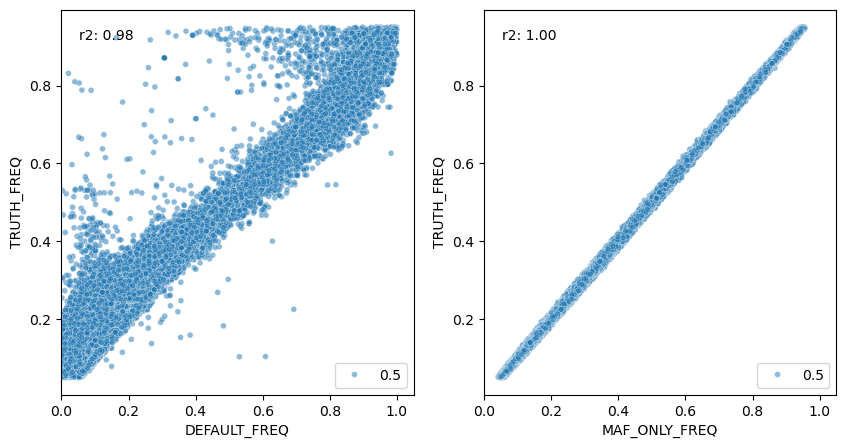

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# compare frequencies
expected = pd.read_csv('plink_base/FREQ.afreq', sep = '\t')\
    [['ID', 'ALT_FREQS']]\
    .rename(columns = {'ALT_FREQS': 'TRUTH_FREQ'})

default = pd.read_csv('plink_test/default_afreq.afreq', sep = '\t')\
    [['ID', 'ALT_FREQS']]\
    .rename(columns = {'ALT_FREQS': 'DEFAULT_FREQ'})

maf_only = pd.read_csv('plink_test/maf-only_afreq.afreq', sep = '\t')\
    [['ID', 'ALT_FREQS']]\
    .rename(columns = {'ALT_FREQS': 'MAF_ONLY_FREQ'})

maf_df = expected.merge(default, on = 'ID').merge(maf_only, on = 'ID')

# plot the maf_only and default vs. truth in two side-by-side plots

fig, axes = plt.subplots(1, 2, figsize = (10, 5))

sns.scatterplot(x = maf_df['DEFAULT_FREQ'], y = maf_df['TRUTH_FREQ'], size = 0.5, alpha = 0.5, ax = axes[0])
sns.scatterplot(x = maf_df['MAF_ONLY_FREQ'], y = maf_df['TRUTH_FREQ'], size = 0.5, alpha = 0.5, ax = axes[1])

# annotate with r2 and rmse

axes[0].text(0.05, 0.95, f'r2: {maf_df["DEFAULT_FREQ"].corr(maf_df["TRUTH_FREQ"]):.2f}', transform = axes[0].transAxes, ha = 'left', va = 'top')
axes[1].text(0.05, 0.95, f'r2: {maf_df["MAF_ONLY_FREQ"].corr(maf_df["TRUTH_FREQ"]):.2f}', transform = axes[1].transAxes, ha = 'left', va = 'top')

# xlim from 0 to 1.05
axes[0].set_xlim(0, 1.05)
axes[1].set_xlim(0, 1.05)

plt.show()

## MAF Simulation Performance

The MAF-only simulation (excluding the Markov Chain walk) adheres more strictly to the expected MAFs. 
Following the forward (left only window) and reverse (symmetric window) walks, the MAFs drift from the expected. 

In [8]:
# compare ld

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

expected = pd.read_csv('plink_base/LD.vcor', sep = '\t')\
    [['ID_A', 'ID_B', 'UNPHASED_R']]\
    .rename(columns = {'UNPHASED_R': 'TRUTH_R'})\
    .astype({'ID_A': str, 'ID_B': str, 'TRUTH_R': np.float64})

default = pd.read_csv('plink_test/default_ld.vcor', sep = '\t')\
    [['ID_A', 'ID_B', 'UNPHASED_R']]\
    .rename(columns = {'UNPHASED_R': 'TEST_R'})\
    .astype({'ID_A': str, 'ID_B': str, 'TEST_R': np.float64})

maf_only = pd.read_csv('plink_test/maf-only_ld.vcor', sep = '\t')\
    [['ID_A', 'ID_B', 'UNPHASED_R']]\
    .rename(columns = {'UNPHASED_R': 'TEST_R'})\
    .astype({'ID_A': str, 'ID_B': str, 'TEST_R': np.float64})

def get_fn_rate(df):
    """Among places where the truth is defined, how often is that place not defined in the test set?
    This is false negative rate"""
    if df.shape[0] == 0:
        return 0
    return df[df['TEST_R'].isna()].shape[0] / df[df['TRUTH_R'].notna()].shape[0]

def get_fp_rate(df):
    """Among places where the test is defined, how often is that place not defined in the truth set?
    This is false positive rate"""
    if df.shape[0] == 0:
        return 0
    return df[df['TRUTH_R'].isna()].shape[0] / df.shape[0]

def get_match_rate(df):
    """Among places where both the test and truth are defined, how often are they in the same quadrant?
    Match rate. I wouldn't necessarily call this sensitivity, just a rate of agreement.
    """
    # count where test and truth are not nan and in the same quadrant (>0.5, <-0.5)
    filtered = df[~df['TEST_R'].isna() & ~df['TRUTH_R'].isna()]
    match = filtered[(filtered['TEST_R'] > 0.5) & (filtered['TRUTH_R'] > 0.5) | (filtered['TEST_R'] < -0.5) & (filtered['TRUTH_R'] < -0.5)].shape[0]
    if filtered.shape[0] == 0:
        return 0
    return match / filtered.shape[0]

ld_default_df = expected\
    .merge(default, on = ['ID_A', 'ID_B'], how = 'outer')

default_metrics = {
    'missed_signal': get_fn_rate(ld_default_df),
    'added_signal': get_fp_rate(ld_default_df),
    'match_rate': get_match_rate(ld_default_df)
}

default_metrics_df = pd.DataFrame(default_metrics, index = ['MARKOV'])

ld_maf_only_df = expected\
    .merge(maf_only, on = ['ID_A', 'ID_B'], how = 'outer')

maf_only_metrics = {
    'missed_signal': get_fn_rate(ld_maf_only_df),
    'added_signal': get_fp_rate(ld_maf_only_df),
    'match_rate': get_match_rate(ld_maf_only_df)
}

maf_only_metrics_df = pd.DataFrame(maf_only_metrics, index = ['MAF_ONLY'])

pd.concat([default_metrics_df, maf_only_metrics_df])


,missed_signal,added_signal,match_rate
MARKOV,0.896375,0.014818,0.729056
MAF_ONLY,1.000000,0.000000,0.000000


# LD Signal Recovery

Applying a simple bidirectional Markov Chain approach with local LD signal recovers ~10% more signal than a MAF-only simulation. 

# Conclusions

HapSim-Lite shows proof-of-concept for lightweight population variant simulation. 
Further tuning of input hyperparameters and the core algorithm might lead to further improvements. 